# Data Science & Business Analytics Tasks

<font color='blue'>
<font size=6>
    TASK 1-Prediction using Supervised ML(LINEAR REGRESSION) 


## BY - SAGNICK BHAR
## 1 - Importing Packages ##

First, let's import all the packages that will be needed during this assignment. 
- [numpy]
- [panda] 
- [matplotlib]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Data Successfully Imported')
Data

Data Successfully Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Printing the first 5 rows of dataset...
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 2 - Overview of the Problem set ##

**Problem Statement**: 
Predict the percentage of an student based on the number of study hours.
This is a simple linear regression task as it involves just 2 variables.

In [4]:
# Printing the last 5 rows of dataset...
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# descibe() helps us to see the percentiles, mean, std, max, count of the given dataset.
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Printing the full summary of the dataframe...
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## 3 - Visualizing Data ## 



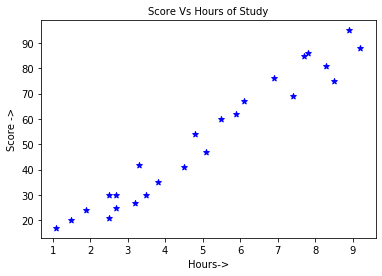

In [9]:
# Plotting Scatter Plot--
plt.xlabel('Hours->',fontsize = 10)
plt.ylabel('Score ->',fontsize = 10)
plt.title('Score Vs Hours of Study', fontsize=10)
plt.scatter(Data.Hours,Data.Scores,color='blue',marker='*')
plt.show()

### SCATTER PLOT

This positive linear relationship shows how the score of a student is directly proportional to the amount of hours spent on studying.

In [10]:
X = Data.iloc[:,:-1].values
Y = Data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

## 4 - Preparing Datasets by splitting them into Training & Test Datasets


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0, test_size=0.2)

In [13]:
# We heave split our data using 80:20 Rule(PARETO)
print ("X train.shape =", X_train.shape)
print ("Y train.shape =", Y_train.shape)
print ("X train.shape =", X_test.shape)
print ("Y train.shape =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X train.shape = (5, 1)
Y train.shape = (5,)


## 5 - TRAINING THE MODEL


In [15]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [16]:
#Fitting Training Data
linreg.fit(X_train,Y_train)
print("The Training of our algorithm is finished!")

The Training of our algorithm is finished!


In [17]:
#B0-->intercept, B1-->slope of the line
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)

B0 = 2.018160041434662 
B1 = [9.91065648]


In [18]:
#Plotting the Regression Line---
Y0 = linreg.intercept_ + linreg.coef_*X_train

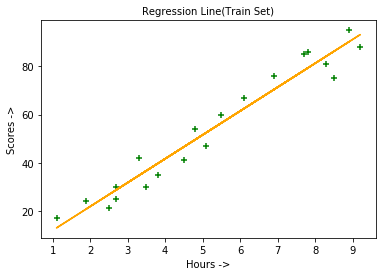

In [20]:
#Plotting on Train Data---
plt.scatter(X_train,Y_train,color='green',marker='+')
plt.plot(X_train,Y0,color='orange')
plt.xlabel('Hours ->', fontsize=10)
plt.ylabel('Scores ->', fontsize=10)
plt.title('Regression Line(Train Set)', fontsize=10)
plt.show()

## 6 - TESTING DATA


In [22]:
#Predicting the scores for test data
Y_pred=linreg.predict(X_test)

In [23]:
#Printing the Y_test
Y_test

array([20, 27, 69, 30, 62])

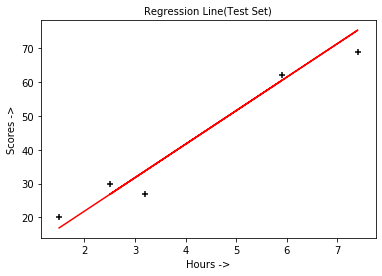

In [25]:
#Plotting line on Test Data---
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='black',marker='+')
plt.xlabel('Hours ->', fontsize=10)
plt.ylabel('Scores ->', fontsize=10)
plt.title('Regression Line(Test Set)', fontsize=10)
plt.show()

## Comparing Actual Score Versus Predicted Score


In [27]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({"Actual":Y_test1,"Result":prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## 7 - ACCURACY OF THE MODEL


In [29]:
#Goodness of Fit Test
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105354

## PREDICTING THE ERROR


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [32]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373


## PREDICTING THE SCORE


In [33]:
Prediction_score = linreg.predict([[9.25]])
print("Predicted score for a student studting for 9.25 hours = : ",Prediction_score)

Predicted score for a student studting for 9.25 hours = :  [93.69173249]


## 8 - CONCLUSION


From above result we can say that if a student studied for 9.25 hours then he/she will be able to secure 93.69 marks.